In [35]:
library(tidyverse)
library(tidymodels)
library(themis)

In [2]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [9]:
data_filtered <- players |>
select(Age, subscribe) |>
filter(!is.na(Age), !is.na(subscribe)) |>
mutate(subscribe = as_factor(subscribe))
data_filtered

Age,subscribe
<dbl>,<fct>
9,TRUE
17,TRUE
17,FALSE
21,TRUE
21,TRUE
17,TRUE
19,TRUE
21,FALSE
17,TRUE


In [49]:
# Step 1: Prepare filtered data
data_filtered <- players |>
select(Age, subscribe) |>
filter(!is.na(Age), !is.na(subscribe)) |>
mutate(subscribe = as_factor(subscribe))
data_filtered

data_filtered |>
  group_by(subscribe) |>
  summarize(count = n())
#want to see if response varibale is imbalanced or not

# Step 2: Split into train/test (stratify on subscribe)
set.seed(123)
data_split <- initial_split(data_filtered, prop = 0.8, strata = subscribe)
train_data <- training(data_split)
test_data <- testing(data_split)

library(tidymodels)

# Define your recipe (example with Age predicting subscribe)
subscribe_recipe <- recipe(subscribe ~ Age, data = data_train) |>
step_normalize(all_predictors()) |>
step_upsample(subscribe)

# Create 5-fold cross-validation splits stratified by subscribe
subscribe_vfold <- vfold_cv(data_train, v = 5, strata = subscribe)

# Define your KNN model specification with tuning neighbors
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Grid of k values to tune
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# Workflow with recipe + model
knn_wf <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec)

# Metrics to collect: accuracy, precision, recall
metrics <- metric_set(accuracy, precision, recall)

# Tune grid and collect metrics
knn_results <- knn_wf |>
  tune_grid(resamples = subscribe_vfold, grid = k_vals, metrics = metrics) |>
  collect_metrics()

# Filter and view metrics for neighbors tuning
print(knn_results)

# Find best k based on accuracy (or choose another metric like precision)
best_k <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)
best_k

Age,subscribe
<dbl>,<fct>
9,TRUE
17,TRUE
17,FALSE
21,TRUE
21,TRUE
17,TRUE
19,TRUE
21,FALSE
17,TRUE


subscribe,count
<fct>,<int>
FALSE,52
TRUE,142


# A tibble: 60 × 7
   neighbors .metric   .estimator  mean     n std_err .config              
       <dbl> <chr>     <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy  binary     0.291     5 0.0312  Preprocessor1_Model01
 2         1 precision binary     0.245     5 0.0158  Preprocessor1_Model01
 3         1 recall    binary     0.796     5 0.0742  Preprocessor1_Model01
 4         6 accuracy  binary     0.311     5 0.0315  Preprocessor1_Model02
 5         6 precision binary     0.256     5 0.0115  Preprocessor1_Model02
 6         6 recall    binary     0.821     5 0.0631  Preprocessor1_Model02
 7        11 accuracy  binary     0.297     5 0.00916 Preprocessor1_Model03
 8        11 precision binary     0.230     5 0.00642 Preprocessor1_Model03
 9        11 recall    binary     0.693     5 0.0285  Preprocessor1_Model03
10        16 accuracy  binary     0.303     5 0.0118  Preprocessor1_Model04
# ℹ 50 more rows


[1] 86

In [50]:
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

final_workflow <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(final_spec)

final_fit <- final_workflow |>
  fit(data = data_train)

final_predictions <- predict(final_fit, data_test) |>
  bind_cols(data_test)

# Evaluate performance
metrics <- metrics(final_predictions, truth = subscribe, estimate = .pred_class)
metrics

# Confusion matrix
conf_mat <- conf_mat(final_predictions, truth = subscribe, estimate = .pred_class)
conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694
precision,binary,0.3636364
recall,binary,0.3076923


          Truth
Prediction FALSE TRUE
     FALSE     4    7
     TRUE      9   29

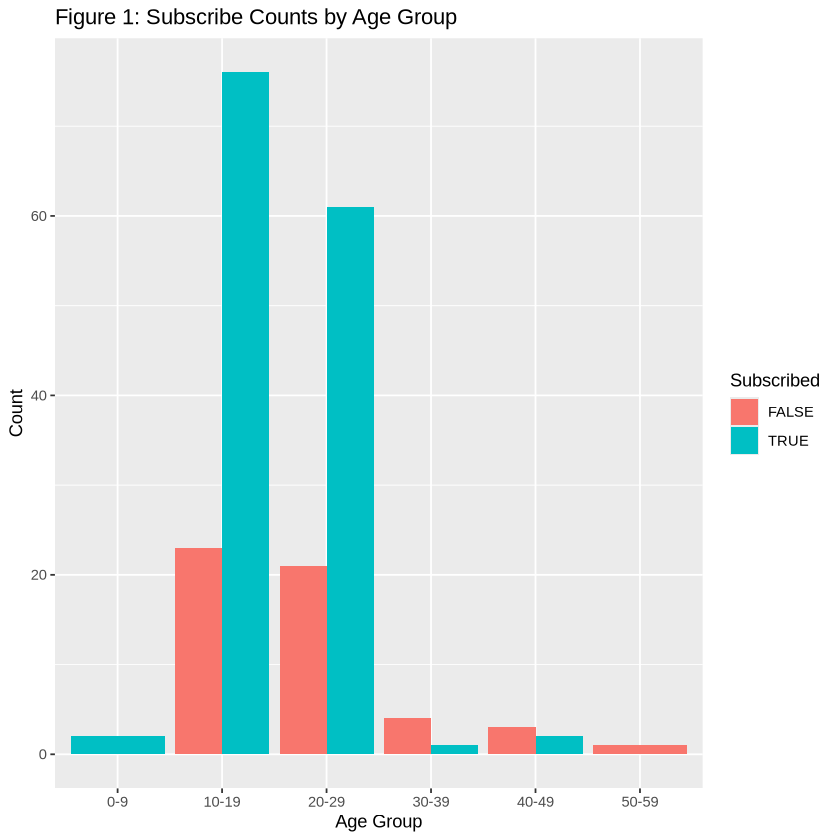

In [53]:
library(dplyr)
library(ggplot2)

# Assuming your data_filtered has Age and subscribe columns
data_binned <- data_filtered |>
mutate(age_group = cut(Age, breaks = seq(0, 60, by = 10), right = FALSE,
                         labels = c("0-9", "10-19", "20-29", "30-39", "40-49", "50-59")))

ggplot(data_binned, aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "dodge") +  # dodge makes grouped bars
  labs(title = "Figure 1: Subscribe Counts by Age Group",
       x = "Age Group",
       y = "Count",
       fill = "Subscribed")